# Simulation Project
- Negin Mashayekhi 98243054
- Parsa Noori 98243067

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
import warnings

## Request 1

Functions

In [2]:
# Function to calculate algebraic connectivity
def calculate_algebraic_connectivity(graph):
    laplacian_matrix = nx.laplacian_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(laplacian_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)
    algebraic_connectivity = sorted_eigenvalues[1]  # Smallest non-zero eigenvalue
    return algebraic_connectivity

# Function to calculate spectral gap
def calculate_spectral_gap(graph):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(adjacency_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)
    spectral_gap = sorted_eigenvalues[-1] - sorted_eigenvalues[-2]  # Difference between largest and second largest eigenvalues
    return spectral_gap
    
# Function to calculate natural connectivity
def calculate_natural_connectivity(graph):
    eigenvalues = nx.linalg.spectrum.normalized_laplacian_spectrum(graph)
    natural_connectivity = sum([abs(e) for e in eigenvalues])
    return natural_connectivity

# Function to calculate energy and Laplacian energy
def calculate_energy(graph):
    eigenvalues = nx.linalg.spectrum.laplacian_spectrum(graph)
    energy = sum([abs(e) for e in eigenvalues])
    laplacian_energy = sum([e**2 for e in eigenvalues])
    return energy, laplacian_energy

Code

In [4]:
# Generate and analyze ER graph
p = 0.5  # Probability of edge existence
er_graph = nx.erdos_renyi_graph(1000, p)
er_natural_connectivity = calculate_natural_connectivity(er_graph)
er_energy, er_laplacian_energy = calculate_energy(er_graph)
er_algebraic_connectivity = calculate_algebraic_connectivity(er_graph)
er_spectral_gap = calculate_spectral_gap(er_graph)

# Generate and analyze Scale-free graph using Barabasi-Albert model
m0 = 3  # Initial number of nodes
sf_graph = nx.barabasi_albert_graph(1000, m0)
sf_natural_connectivity = calculate_natural_connectivity(sf_graph)
sf_energy, sf_laplacian_energy = calculate_energy(sf_graph)
sf_algebraic_connectivity = calculate_algebraic_connectivity(sf_graph)
sf_spectral_gap = calculate_spectral_gap(sf_graph)

# Generate and analyze Watts-Strogatz small-world graph
p_rewire = 0.3  # Probability of rewiring
ws_graph = nx.watts_strogatz_graph(1000, 4, p_rewire)
ws_natural_connectivity = calculate_natural_connectivity(ws_graph)
ws_energy, ws_laplacian_energy = calculate_energy(ws_graph)
ws_algebraic_connectivity = calculate_algebraic_connectivity(ws_graph)
ws_spectral_gap = calculate_spectral_gap(ws_graph)


# Print the results
print("ER Graph:")
print("Natural Connectivity:", er_natural_connectivity)
print("Energy:", er_energy)
print("Laplacian Energy:", er_laplacian_energy)
print("Algebraic Connectivity:", er_algebraic_connectivity)
print("Spectral Gap:", er_spectral_gap)
print()

print("Scale-Free Graph:")
print("Natural Connectivity:", sf_natural_connectivity)
print("Energy:", sf_energy)
print("Laplacian Energy:", sf_laplacian_energy)
print("Algebraic Connectivity:", sf_algebraic_connectivity)
print("Spectral Gap:", sf_spectral_gap)
print()

print("Watts-Strogatz Graph:")
print("Natural Connectivity:", ws_natural_connectivity)
print("Energy:", ws_energy)
print("Laplacian Energy:", ws_laplacian_energy)
print("Algebraic Connectivity:", ws_algebraic_connectivity)
print("Spectral Gap:", ws_spectral_gap)


ER Graph:
Natural Connectivity: 1000.000000000001
Energy: 498460.0000000006
Laplacian Energy: 249193676.00000006
Algebraic Connectivity: 441.6579144335563
Spectral Gap: 468.1862612539235

Scale-Free Graph:
Natural Connectivity: 999.9999999999995
Energy: 5982.0
Laplacian Energy: 99688.0
Algebraic Connectivity: 1.2813750310921237
Spectral Gap: (5.098657890670012+0j)

Watts-Strogatz Graph:
Natural Connectivity: 1000.0000000000001
Energy: 4000.000000000002
Laplacian Energy: 21057.999999999996
Algebraic Connectivity: 0.22403023949332818
Spectral Gap: 0.23289373565012728


### Algebraic Connectivity of ER is maximum.

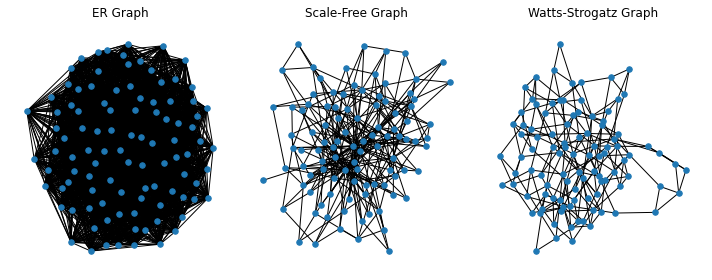

In [7]:
# Draw the graphs
plt.figure(figsize=(10, 4))

plt.subplot(131)
nx.draw(er_graph, with_labels=False, node_size=30)
plt.title("ER Graph")

plt.subplot(132)
nx.draw(sf_graph, with_labels=False, node_size=30)
plt.title("Scale-Free Graph")

plt.subplot(133)
nx.draw(ws_graph, with_labels=False, node_size=30)
plt.title("Watts-Strogatz Graph")

plt.tight_layout()
plt.show()

## Request 2

The time complexity of the function is O(n1*d1)

Functions

In [3]:
def RSRBG(n1, n2, d1, d2):
    start_time = time.time()
    max_execution_time = 4  # Maximum execution time in seconds
    timeout = True

    while timeout:
        timeout = False
        G = nx.Graph()
        # Add nodes to group1
        group1_nodes = [f'G1-{i + 1}' for i in range(n1)]
        G.add_nodes_from(group1_nodes, group='group1', value_degree=d1)

        # Add nodes to group2
        group2_nodes = [f'G2-{i + 1}' for i in range(n2)]
        G.add_nodes_from(group2_nodes, group='group2', value_degree=d2)

        max_cycles = n1 * d1 * 1000

        while any(G.nodes[node]['value_degree'] > 0 for node in G.nodes):
            if max_cycles == 0:
                timeout = True

            # Choose one node from each group
            node1 = random.choice(group1_nodes)
            node2 = random.choice(group2_nodes)

            if node1 != node2 and not G.has_edge(node1, node2):
                # If there is no edge between the chosen nodes, add the edge
                G.add_edge(node1, node2)
                G.nodes[node1]['value_degree'] -= 1
                G.nodes[node2]['value_degree'] -= 1

            max_cycles -= 1

    # Draw the graph
    # plt.figure(figsize=(20, 10))
    # pos = nx.spring_layout(G)
    # colors = ['red' if G.nodes[node]['group'] == 'group1' else 'blue' for node in G.nodes]
    # nx.draw_networkx_nodes(G, pos, node_color=colors)
    # nx.draw_networkx_edges(G, pos)
    # plt.show()

    return G

In [4]:
# functions that we need in request2
def caclulate_metrics(graph):    
    natural_connectivity = calculate_natural_connectivity(graph)
    energy, laplacian_energy = calculate_energy(graph)
    algebraic_connectivity = calculate_algebraic_connectivity(graph)
    spectral_gap = calculate_spectral_gap(graph)
    return natural_connectivity,energy, laplacian_energy,algebraic_connectivity,spectral_gap


def calculate_degree_distribution(graph):
    degrees = [graph.degree(node) for node in graph.nodes()]
    degree_counts = np.bincount(degrees)
    degree_distribution = degree_counts / np.sum(degree_counts)
    return degree_distribution

def calculate_eigenvalue_distribution(graph):
    eigenvalues = nx.linalg.spectrum.adjacency_spectrum(graph)
    eigenvalue_distribution = np.histogram(eigenvalues, bins=10, range=(min(eigenvalues), max(eigenvalues)))[0]
    return eigenvalue_distribution

def draw_distributions(graph):
    # Calculate degree distribution
    degree_distribution = calculate_degree_distribution(graph)

    # Calculate eigenvalue distribution
    eigenvalue_distribution = calculate_eigenvalue_distribution(graph)

    # Calculate other parameters and measures
    spectral_gap = max(eigenvalue_distribution) - eigenvalue_distribution[-2]
    algebraic_connectivity = min(eigenvalue_distribution[eigenvalue_distribution != 0])
    natural_connectivity = sum(np.abs(eigenvalue_distribution))
    symmetry_ratio = d1 / (d1 + d2)
    energy = np.sum(np.abs(eigenvalue_distribution))
    laplacian_energy = np.sum(np.square(eigenvalue_distribution))

    plt.subplot(121)
    plt.hist(degree_distribution, bins='auto',color='orange')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution Histogram')

    # Plot eigenvalue distribution
    plt.subplot(122)
    plt.plot(range(len(eigenvalue_distribution)), eigenvalue_distribution, 'bo-')
    plt.xlabel('Eigenvalue Bin')
    plt.ylabel('Density')
    plt.title('Eigenvalue Distribution')

    plt.tight_layout()
    plt.show()
    



Code

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


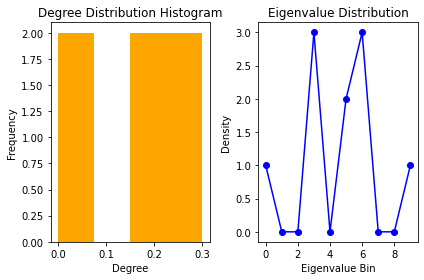

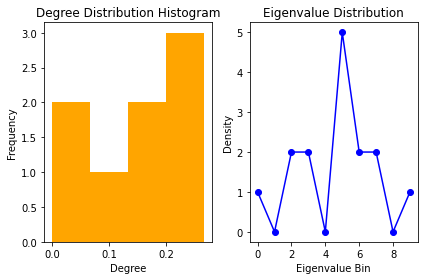

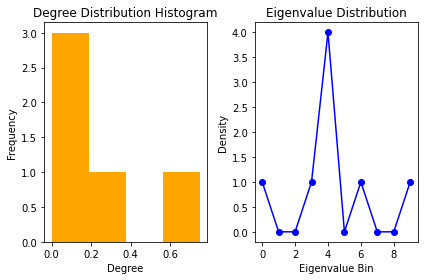

,nc,e,le,ac,sg
0,10.0,34.0,162.0,1.496607,2.365344
1,15.0,58.0,320.0,1.227868,2.177493
2,8.0,30.0,144.0,2.354249,3.000000


In [41]:
# create the graph multy times and store results in a dataframe
request2_df = pd.DataFrame(columns=['nc', 'e', 'le', 'ac', 'sg'])
inputs = [[6,4,2,3],[5,10,4,2],[4,4,3,3]]

for i in range(len(inputs)):
    n1,n2,d1,d2 = inputs[i]
    graph = RSRBG(n1,n2,d1,d2)
    metrics = caclulate_metrics(graph)
    request2_df = pd.concat([request2_df, pd.DataFrame([metrics], columns=request2_df.columns)], ignore_index=True)
    draw_distributions(graph)
request2_df

## Request 3

The function's time complexity is O(n1 * d1 / p).

Functions

In [7]:
def RSRG(n, d1, d2, p):
    return RSRBG(int(n * p), n - int(n * p), d1, d2)


def calculate_metrics(graph):
    nc = len(graph.nodes)
    e = len(graph.edges)
    ac = nx.average_clustering(graph)
    sg = nx.average_node_connectivity(graph)
    
    # Calculate average shortest path length if the graph is connected
    if nx.is_connected(graph):
        le = nx.average_shortest_path_length(graph)
    else:
        le = float("inf")  # Set a large value for disconnected graphs
    
    return nc, e, le, ac, sg

def draw_distributions(graph, d1, d2):
    # Calculate degree distribution
    degree_distribution = calculate_degree_distribution(graph)

    # Calculate eigenvalue distribution
    eigenvalue_distribution = calculate_eigenvalue_distribution(graph)

    # Calculate other parameters and measures
    spectral_gap = max(eigenvalue_distribution) - eigenvalue_distribution[-2]
    algebraic_connectivity = min(
        eigenvalue_distribution[eigenvalue_distribution != 0])
    natural_connectivity = sum(np.abs(eigenvalue_distribution))
    symmetry_ratio = d1 / (d1 + d2)
    energy = np.sum(np.abs(eigenvalue_distribution))
    laplacian_energy = np.sum(np.square(eigenvalue_distribution))

    # Plot degree distribution
    plt.subplot(121)
    plt.hist(degree_distribution, bins='auto', color='orange')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution Histogram')

    # Plot eigenvalue distribution
    plt.subplot(122)
    plt.plot(range(len(eigenvalue_distribution)),
             eigenvalue_distribution, 'bo-')
    plt.xlabel('Eigenvalue Bin')
    plt.ylabel('Density')
    plt.title('Eigenvalue Distribution')

    plt.tight_layout()
    plt.show()

Code

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


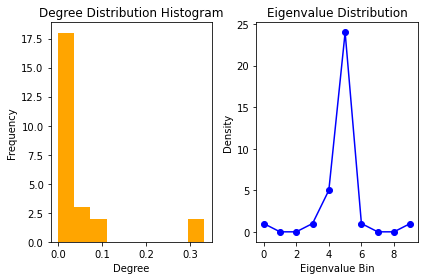

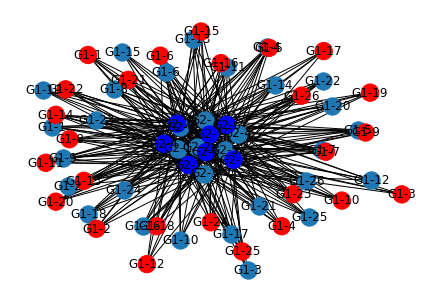

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


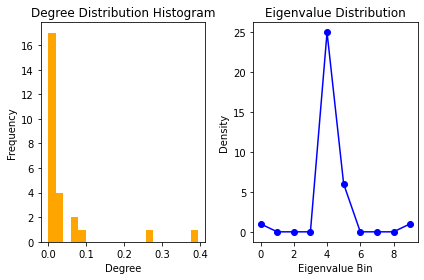

KeyboardInterrupt: 

In [9]:
import pandas as pd
import random
import warnings

# Generate 10 random graphs
generated_graphs = 0
num_attempts = 0

# Initialize the DataFrame
request3_df = pd.DataFrame(columns=['n', 'd1', 'd2', 'p', 'nc', 'e', 'le', 'ac', 'sg'])

while generated_graphs < 5:

    n = random.randint(5, 40)
    d1 = random.randint(2, 10)
    d2 = random.randint(2, 10)
    p = random.uniform(0, 1)

    try:

        graph = RSRG(n, d1, d2, p)
        nc, e, le, ac, sg = calculate_metrics(graph)
        draw_distributions(graph, d1, d2)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            graph = RSRG(n, d1, d2, p)
        # draw the graph
        G = graph
        nx.draw(graph, with_labels=True)
        # Draw the graph
        pos = nx.spring_layout(G)
        colors = ['red' if G.nodes[node]['group'] == 'group1' else 'blue' for node in G.nodes]
        nx.draw_networkx_nodes(G, pos, node_color=colors)
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos)
        plt.show()
        nc, e, le, ac, sg = calculate_metrics(graph)
        draw_distributions(graph, d1, d2)

        # Add the graph and metrics to the DataFrame
        request3_df.loc[generated_graphs] = [n, d1, d2, p, nc, e, le, ac, sg]

        generated_graphs += 1

    except TimeoutError:
        print("Timeout")

    num_attempts += 1

request3_df

## Request 4

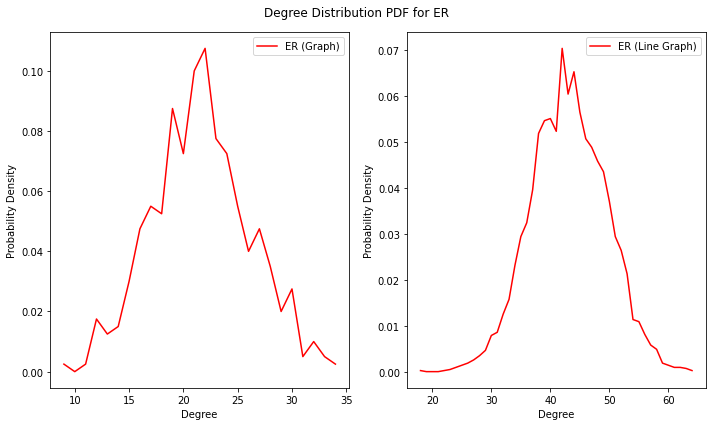

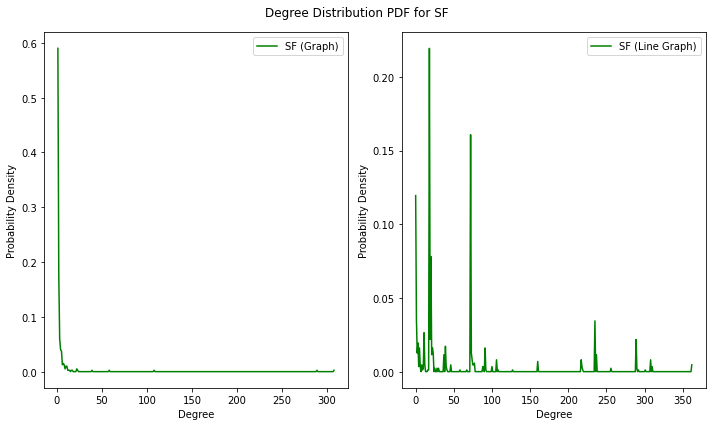

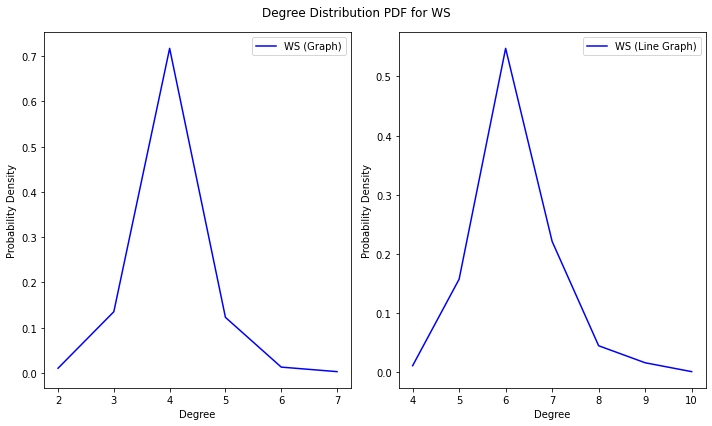

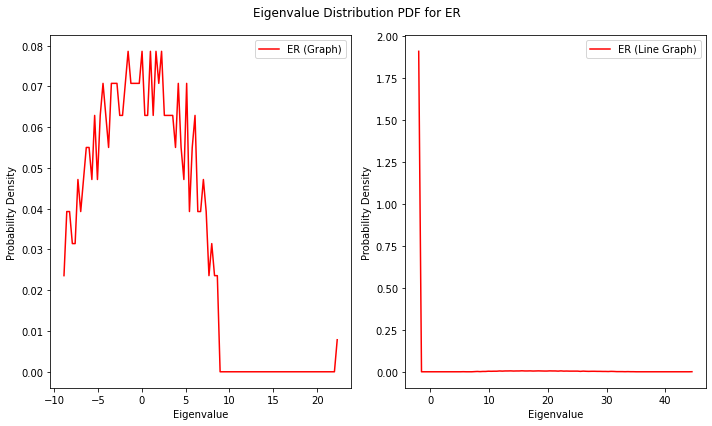

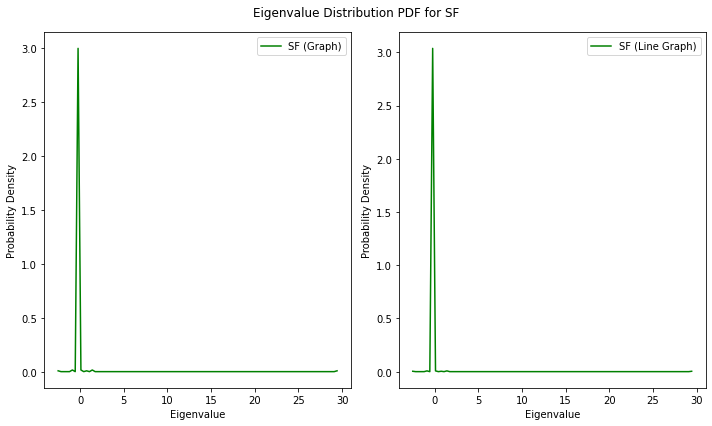

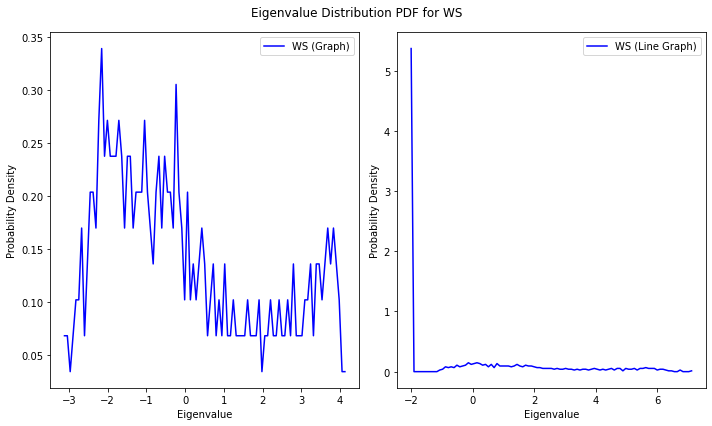

In [3]:
# def degree_distribution_pdf(G):
#     degrees = dict(G.degree())
#     degree_values = np.array(list(degrees.values()))
#     bins = np.arange(min(degree_values), max(degree_values) + 2)
#     degree_hist, _ = np.histogram(degree_values, bins=bins, density=True)
#     return bins[:-1], degree_hist

# def eigenvalue_distribution_pdf(G):
#     eigenvalues = np.real(np.linalg.eigvals(nx.to_numpy_array(G)))
#     bins = np.linspace(min(eigenvalues), max(eigenvalues), num=100)
#     eigenvalue_hist, _ = np.histogram(eigenvalues, bins=bins, density=True)
#     return bins[:-1], eigenvalue_hist

# # Example usage
# G_ER = nx.erdos_renyi_graph(n=400, p=0.054) # ln200/200 , p=2p_c
# G_SF = nx.scale_free_graph(n=400)
# G_WS = nx.watts_strogatz_graph(n=400, k=4, p=0.1)
# # G_RSRG = generate_RSRG_graph(n=500, p=0.5, d1=1, d2=2)
# # G_RSRBG = generate_RSRBG_graph(n=500, p=0.5, d1=1, d2=2)

# line_G_ER = nx.line_graph(G_ER) 
# line_G_SF = nx.line_graph(G_SF)
# line_G_WS = nx.line_graph(G_WS)
# # line_G_RSRG = nx.line_graph(G_RSRG)
# # line_G_RSRBG = nx.line_graph(G_RSRBG)

# graphs = [(G_ER, line_G_ER), (G_SF, line_G_SF), (G_WS, line_G_WS)]
# labels = ['ER', 'SF', 'WS']
# colors = ['red', 'green', 'blue']

# # Plot degree distribution PDF and line graph for each graph
# for i, (G, line_G) in enumerate(graphs):
#     plt.figure(figsize=(10, 6))
    
#     # Degree distribution PDF
#     plt.subplot(1, 2, 1)
#     degree_bins, degree_pdf = degree_distribution_pdf(G)
#     plt.plot(degree_bins, degree_pdf, color=colors[i], label=f'{labels[i]} (Graph)')
#     plt.xlabel('Degree')
#     plt.ylabel('Probability Density')
#     plt.legend()
    
#     # Line graph
#     plt.subplot(1, 2, 2)
#     line_degree_bins, line_degree_pdf = degree_distribution_pdf(line_G)
#     plt.plot(line_degree_bins, line_degree_pdf, color=colors[i], label=f'{labels[i]} (Line Graph)')
#     plt.xlabel('Degree')
#     plt.ylabel('Probability Density')
#     plt.legend()
    
#     plt.suptitle(f'Degree Distribution PDF for {labels[i]}')
#     plt.tight_layout()
#     plt.show()

# # Plot eigenvalue distribution PDF and line graph for each graph
# for i, (G, line_G) in enumerate(graphs):
#     plt.figure(figsize=(10, 6))
    
#     # Eigenvalue distribution PDF
#     plt.subplot(1, 2, 1)
#     eigenvalue_bins, eigenvalue_pdf = eigenvalue_distribution_pdf(G)
#     plt.plot(eigenvalue_bins, eigenvalue_pdf, color=colors[i], label=f'{labels[i]} (Graph)')
#     plt.xlabel('Eigenvalue')
#     plt.ylabel('Probability Density')
#     plt.legend()
    
#     # Line graph
#     plt.subplot(1, 2, 2)
#     line_eigenvalue_bins, line_eigenvalue_pdf = eigenvalue_distribution_pdf(line_G)
#     plt.plot(line_eigenvalue_bins, line_eigenvalue_pdf, color=colors[i], label=f'{labels[i]} (Line Graph)')
#     plt.xlabel('Eigenvalue')
#     plt.ylabel('Probability Density')
#     plt.legend()
    
#     plt.suptitle(f'Eigenvalue Distribution PDF for {labels[i]}')
#     plt.tight_layout()
#     plt.show()


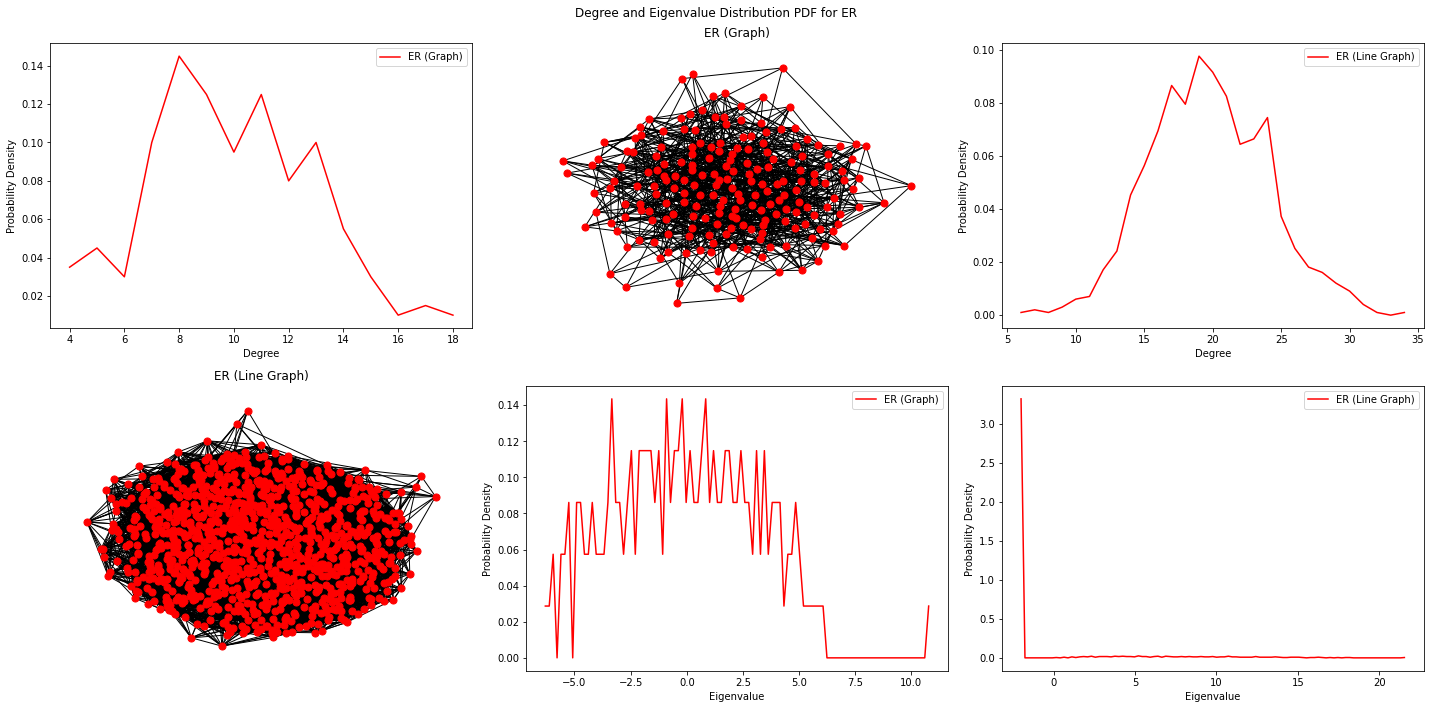

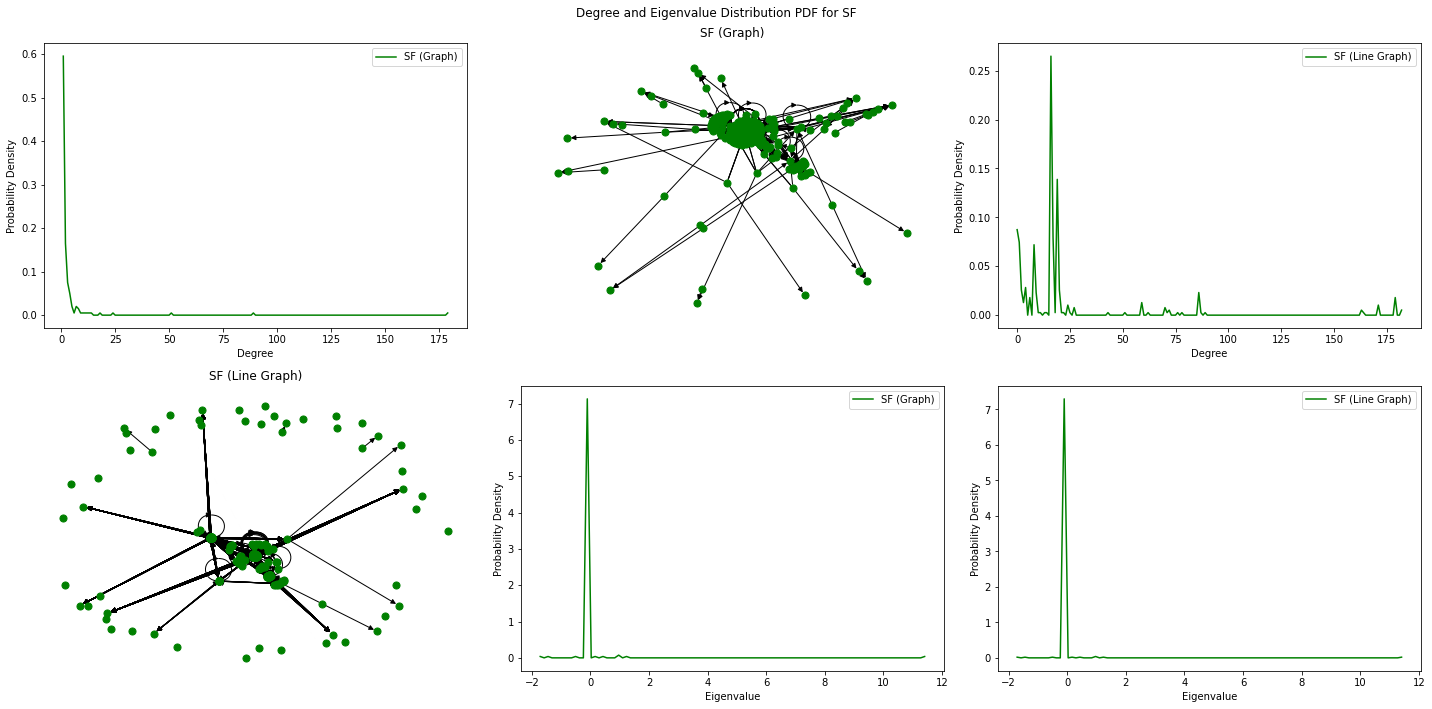

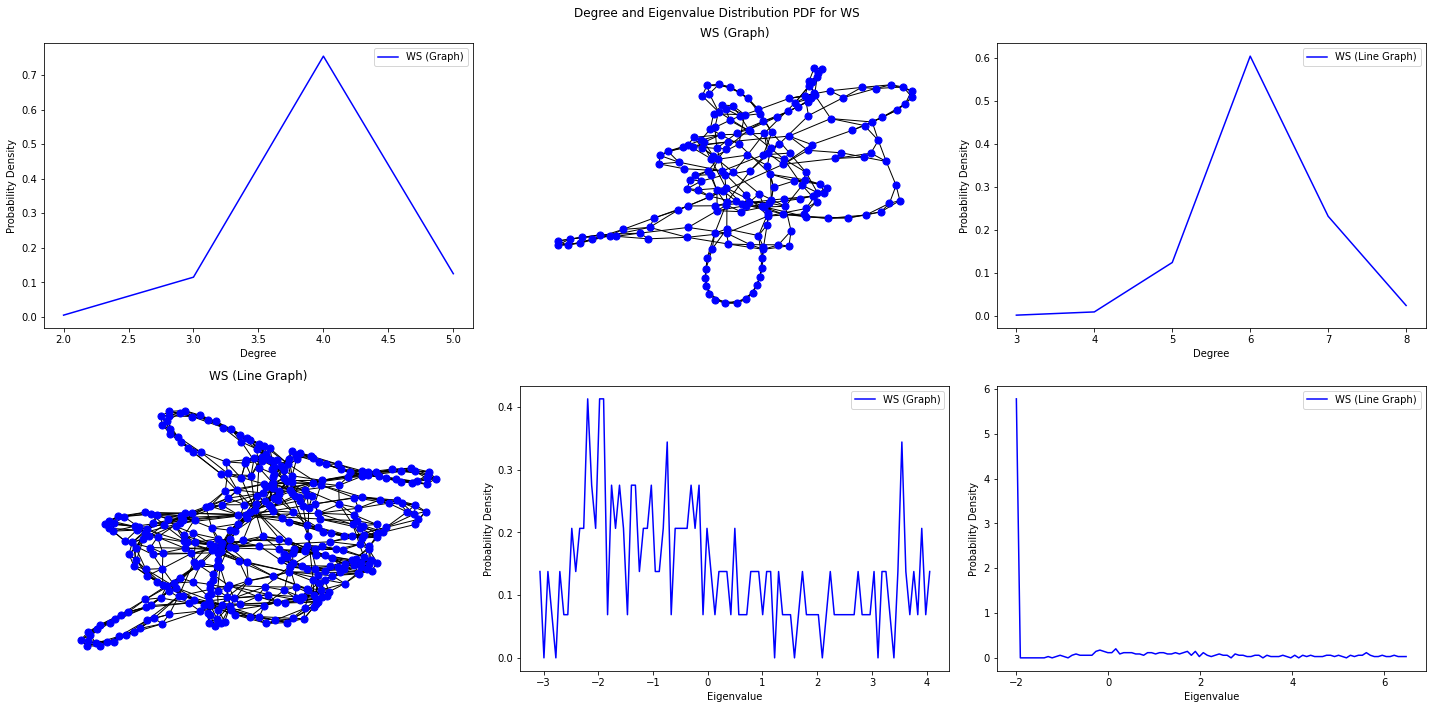

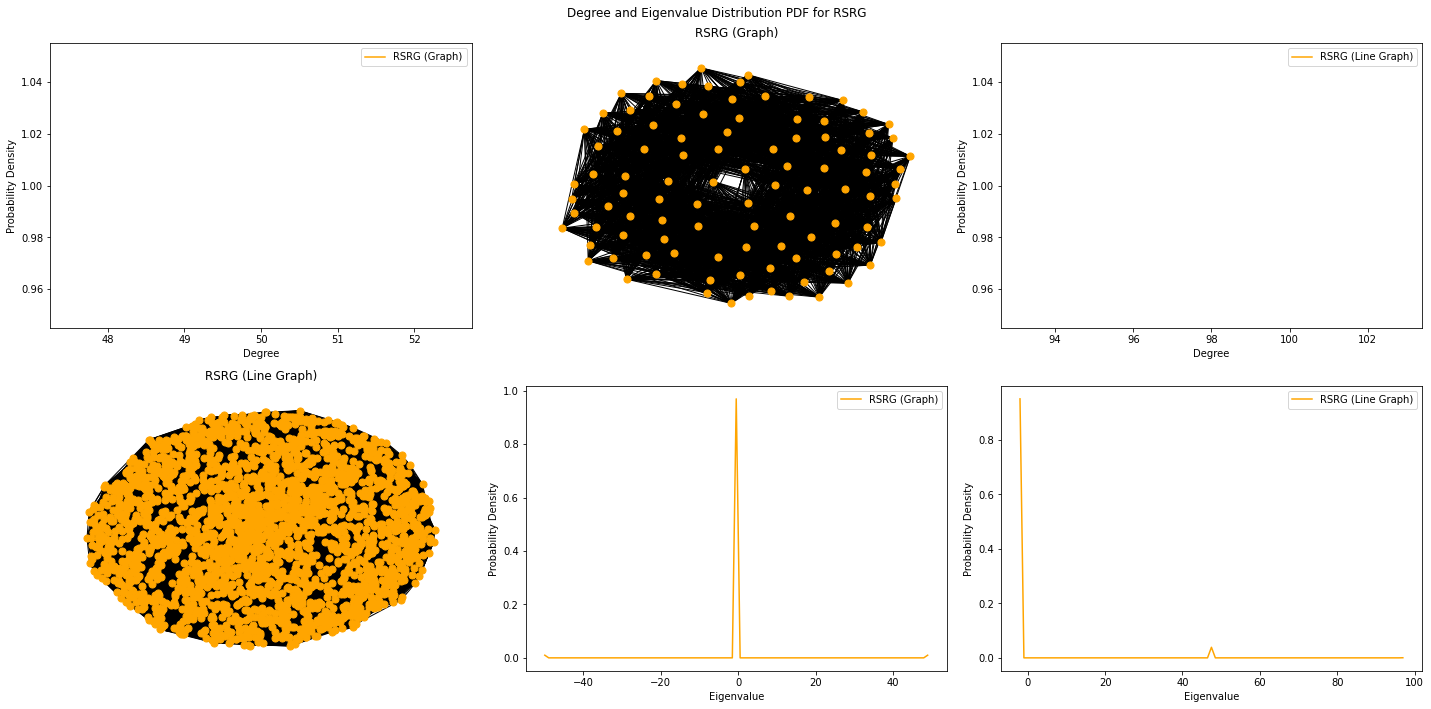

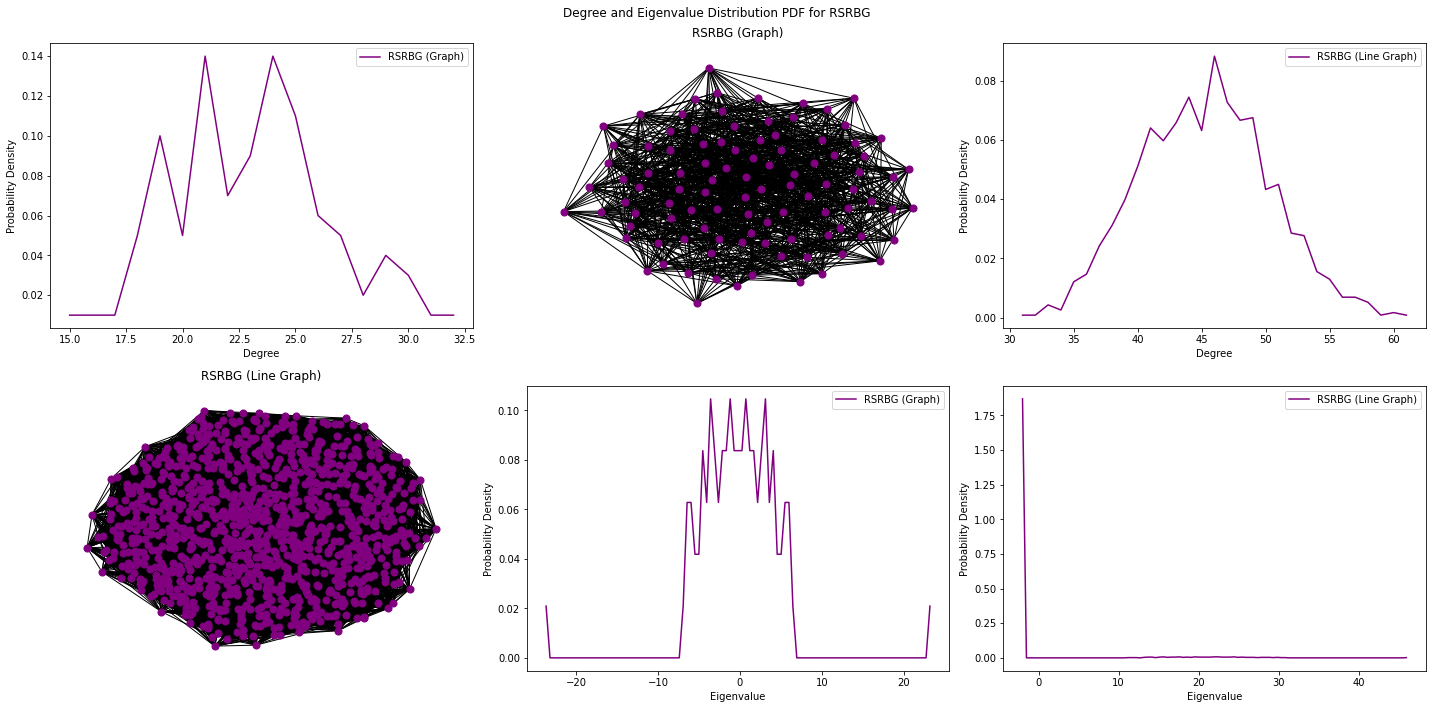

In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def degree_distribution_pdf(G):
    degrees = dict(G.degree())
    degree_values = np.array(list(degrees.values()))
    bins = np.arange(min(degree_values), max(degree_values) + 2)
    degree_hist, _ = np.histogram(degree_values, bins=bins, density=True)
    return bins[:-1], degree_hist

def eigenvalue_distribution_pdf(G):
    eigenvalues = np.real(np.linalg.eigvals(nx.to_numpy_array(G)))
    bins = np.linspace(min(eigenvalues), max(eigenvalues), num=100)
    eigenvalue_hist, _ = np.histogram(eigenvalues, bins=bins, density=True)
    return bins[:-1], eigenvalue_hist

# Example usage
G_ER = nx.erdos_renyi_graph(n=200, p=0.05)
G_SF = nx.scale_free_graph(n=200)
G_WS = nx.watts_strogatz_graph(n=200, k=4, p=0.1)
G_RSRG = RSRG(100,50,15,0.5)
G_RSRBG = RSRBG(50,50,15,15)

line_G_ER = nx.line_graph(G_ER)
line_G_SF = nx.line_graph(G_SF)
line_G_WS = nx.line_graph(G_WS)
line_G_RSRG = nx.line_graph(G_RSRG)
line_G_RSRBG = nx.line_graph(G_RSRBG)

graphs = [(G_ER, line_G_ER), (G_SF, line_G_SF), (G_WS, line_G_WS), (G_RSRG, line_G_RSRG), (G_RSRBG, line_G_RSRBG)]
labels = ['ER', 'SF', 'WS', 'RSRG', 'RSRBG']
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Plot degree distribution PDF, main graph, and line graph for each graph
for i, (G, line_G) in enumerate(graphs):
    plt.figure(figsize=(20, 10))
    
    # Degree distribution PDF
    plt.subplot(2, 3, 1)
    degree_bins, degree_pdf = degree_distribution_pdf(G)
    plt.plot(degree_bins, degree_pdf, color=colors[i], label=f'{labels[i]} (Graph)')
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.legend()
    
    # Main graph
    plt.subplot(2, 3, 2)
    nx.draw(G, node_color=colors[i], node_size=50)
    plt.title(f'{labels[i]} (Graph)')
    
    # Line graph
    plt.subplot(2, 3, 3)
    line_degree_bins, line_degree_pdf = degree_distribution_pdf(line_G)
    plt.plot(line_degree_bins, line_degree_pdf, color=colors[i], label=f'{labels[i]} (Line Graph)')
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.legend()
    
    # Line graph
    plt.subplot(2, 3, 4)
    nx.draw(line_G, node_color=colors[i], node_size=50)
    plt.title(f'{labels[i]} (Line Graph)')
    
    # Eigenvalue distribution PDF
    plt.subplot(2, 3, 5)
    eigenvalue_bins, eigenvalue_pdf = eigenvalue_distribution_pdf(G)
    plt.plot(eigenvalue_bins, eigenvalue_pdf, color=colors[i], label=f'{labels[i]} (Graph)')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Probability Density')
    plt.legend()
    
    # Line graph
    plt.subplot(2, 3, 6)
    line_eigenvalue_bins, line_eigenvalue_pdf = eigenvalue_distribution_pdf(line_G)
    plt.plot(line_eigenvalue_bins, line_eigenvalue_pdf, color=colors[i], label=f'{labels[i]} (Line Graph)')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Probability Density')
    plt.legend()
    
    plt.suptitle(f'Degree and Eigenvalue Distribution PDF for {labels[i]}')
    plt.tight_layout()
    plt.show()


## Request 5

In [15]:
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt

# def sf_degree_distribution_pdf(N, avg_degree, num_graphs=1000):
#     gammas = [2.0, 2.5, 3.0, 3.5, 4.0]  # Values of γ to consider

#     for gamma in gammas:
#         degree_distributions = []

#         for _ in range(num_graphs):
#             # Generate a Scale-Free graph with the specified parameters
#             graph = nx.barabasi_albert_graph(N, int(avg_degree/2), seed=None)

#             # Calculate the degrees of all nodes
#             degrees = [degree for _, degree in graph.degree()]

#             # Calculate the degree distribution
#             degree_counts, degree_bins = np.histogram(degrees, bins='auto', density=True)
#             degree_pdf = degree_counts / np.sum(degree_counts)

#             # Add the degree distribution to the list
#             degree_distributions.append(degree_pdf)

#         # Find the minimum length among all degree distributions
#         min_length = min(len(d) for d in degree_distributions)

#         # Truncate or pad the degree distributions to have the same length
#         degree_distributions = [d[:min_length] if len(d) > min_length else np.pad(d, (0, min_length - len(d))) for d in degree_distributions]

#         # Calculate the average degree distribution
#         avg_degree_distribution = np.mean(degree_distributions, axis=0)

#         # Plot the logarithm of the degree distribution
#         log_degree_bins = np.log(degree_bins[:-1])
#         log_degree_pdf = np.log(avg_degree_distribution)

#         plt.plot(log_degree_bins, log_degree_pdf, label=f'γ = {gamma}')

#     plt.xlabel('Log(Degree)')
#     plt.ylabel('Log(Probability Density)')
#     plt.title('Probability Density Function of Degree Distribution in Scale-Free Model')
#     plt.legend()
#     plt.show()


In [1]:
# sf_degree_distribution_pdf(N=500, avg_degree=4, num_graphs=10)

### New Codes

Text(0, 0.5, 'Frequency')

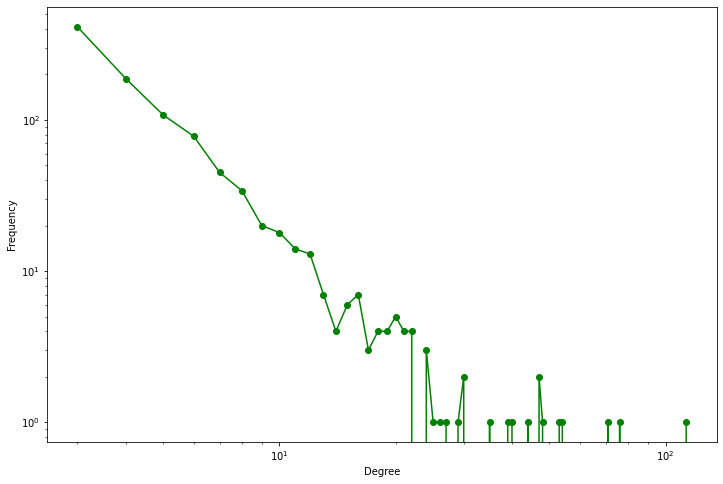

In [10]:
m=3
G = nx.barabasi_albert_graph(1000, m)

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

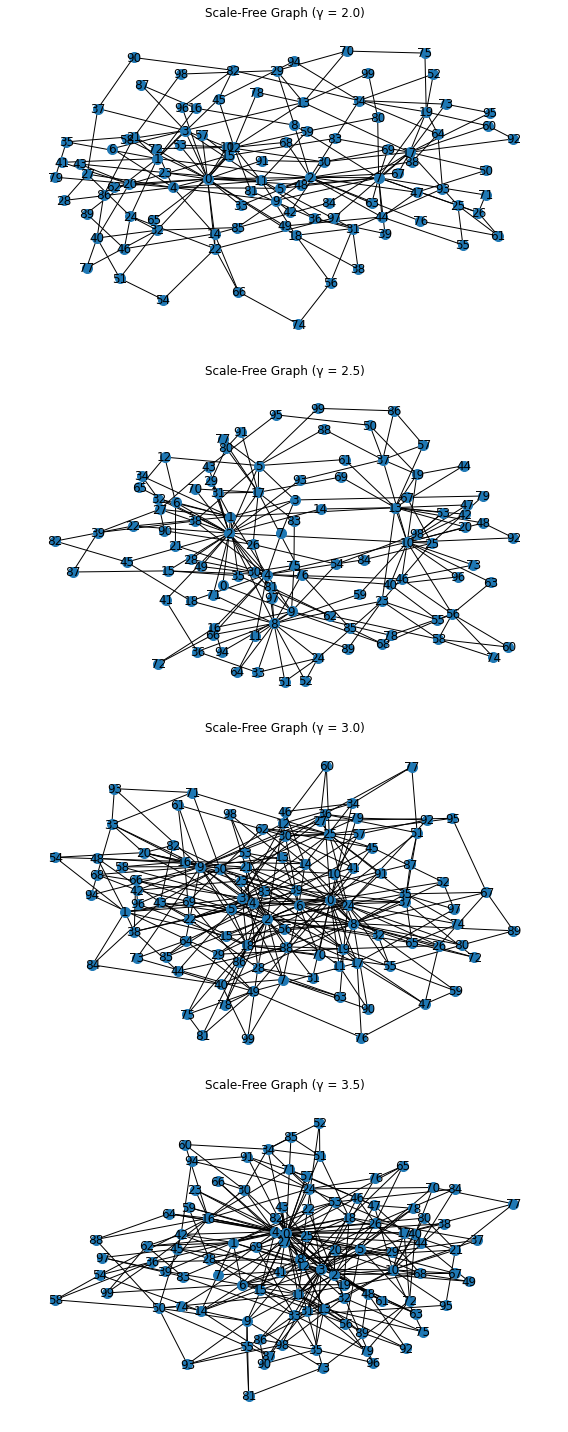

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate scale-free graph with different gamma values
gammas = [2.0, 2.5, 3.0, 3.5]

# Create a figure to plot the graphs
fig, axs = plt.subplots(len(gammas), figsize=(8, 5 * len(gammas)))

# Generate and plot scale-free graphs with different gammas
for i, gamma in enumerate(gammas):
    # Generate scale-free graph using the power-law degree sequence
    G = nx.powerlaw_cluster_graph(100, int(gamma), 0.3)
    
    # Plot the graph
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=100, ax=axs[i])
    axs[i].set_title(f"Scale-Free Graph (γ = {gamma})")

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Display the plots
plt.show()


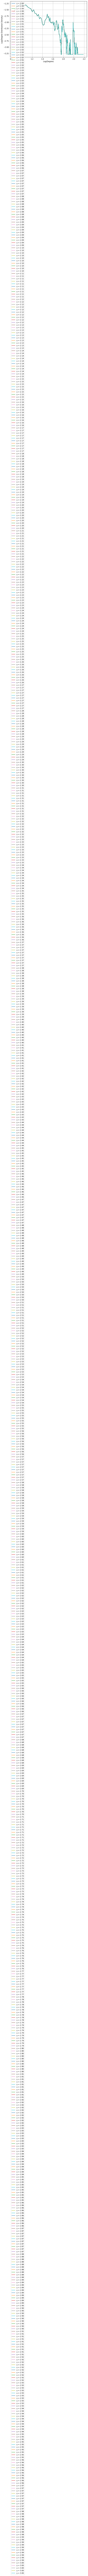

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def compute_degree_distribution_density(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_values, degree_counts = np.unique(degree_sequence, return_counts=True)
    degree_distribution = degree_counts / len(graph)
    return degree_values, degree_distribution

num_graphs = 1000
N = 500
avg_degree = 4

gammas = np.linspace(2.0, 3.0, num_graphs)  # Range of gamma values

fig, ax = plt.subplots(figsize=(8, 6))

for gamma in gammas:
    # Generate scale-free graph
    G = nx.barabasi_albert_graph(N, avg_degree, seed=42)
    
    # Generate line graph
    line_graph = nx.line_graph(G)
    
    # Compute degree distribution density of line graph
    degree_values, degree_distribution = compute_degree_distribution_density(line_graph)
    
    # Plot the logarithm of the degree distribution density
    log_degree_values = np.log10(degree_values)
    log_degree_distribution = np.log10(degree_distribution)
    ax.plot(log_degree_values, log_degree_distribution, label=f"γ = {gamma:.2f}")

ax.set_xlabel("Log(Degree)")
ax.set_ylabel("Log(Degree Distribution Density)")
ax.legend()
ax.grid(True)

plt.show()


## Request 6

## Request 7

## Request 8

## Request 9

# GUI